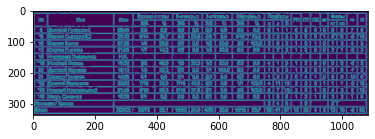

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot

filename = 'data/proto_new1.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 50, 150)
pyplot.imshow(canny)

In [8]:
# cv.HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]]) → lines

rho = 1
theta = np.pi/180
threshold = 50
minLinLength = 350
maxLineGap = 6
linesP = cv2.HoughLinesP(canny, rho , theta, threshold, None, minLinLength, maxLineGap)

hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2
hi 2


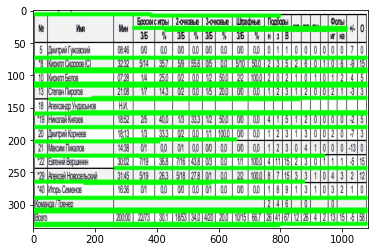

In [14]:
def is_vertical(line):
    return line[0]==line[2]
def is_horizontal(line):
    return line[1]==line[3]

horizontal_lines = []
vertical_lines = []
    
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        if (is_vertical(l)):
            print('hi 1')
            vertical_lines.append(l)
                
        elif (is_horizontal(l)):
            print('hi 2')
            horizontal_lines.append(l)

for i, line in enumerate(horizontal_lines):
    cv2.line(img, (line[0], line[1]), (line[2], line[3]), (0,255,0), 3, cv2.LINE_AA)
                      
for i, line in enumerate(vertical_lines):
    cv2.line(img, (line[0], line[1]), (line[2], line[3]), (0,0,255), 3, cv2.LINE_AA)
    
pyplot.imshow(img, aspect='auto')

# test 2

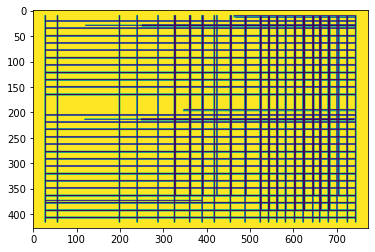

In [2]:
import cv2
import numpy as np

image = cv2.imread('data/proto_new1.jpg', -1)
(hei,wid,_) = image.shape

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)

thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

#Retrieve contours 
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#Create box-list
box = []
# Get position (x,y), width and height for every contour 
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    box.append([x,y,w,h])
    
    
#Create separate lists for all values
heights=[]
widths=[]
xs=[]
ys=[]
#Store values in lists
for b in box:
    heights.append(b[3])
    widths.append(b[2])
    xs.append(b[0])
    ys.append(b[1])
#Retrieve minimum and maximum of lists
min_height = np.min(heights)
min_width = np.min(widths)
min_x = np.min(xs)
min_y = np.min(ys)
max_y = np.max(ys)
max_x = np.max(xs)


#Retrieve height where y is maximum (edge at bottom, last row of table)
for b in box:
    if b[1] == max_y:
        max_y_height = b[3]
#Retrieve width where x is maximum (rightmost edge, last column of table)
for b in box:
    if b[0] == max_x:
        max_x_width = b[2]
        
# Obtain horizontal lines mask
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,1))
horizontal_mask = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
horizontal_mask = cv2.dilate(horizontal_mask, horizontal_kernel, iterations=9)

# Obtain vertical lines mask
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,50))
vertical_mask = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=1)
vertical_mask= cv2.dilate(vertical_mask, vertical_kernel, iterations=9)

# Bitwise-and masks together
result = 255 - cv2.bitwise_or(vertical_mask, horizontal_mask)

#Cropping the image to the table size
crop_img = result[(min_y+5):(max_y+max_y_height), (min_x):(max_x+max_x_width+5)]
#Creating a new image and filling it with white background
img_white = np.zeros((hei, wid), np.uint8)
img_white[:, 0:wid] = (255)
#Retrieve the coordinates of the center of the image
x_offset = int((wid - crop_img.shape[1])/2)
y_offset = int((hei - crop_img.shape[0])/2)
#Placing the cropped and repaired table into the white background
img_white[ y_offset:y_offset+crop_img.shape[0], x_offset:x_offset+crop_img.shape[1]] = crop_img
#Viewing the result
pyplot.imshow(img_white)

# test 3

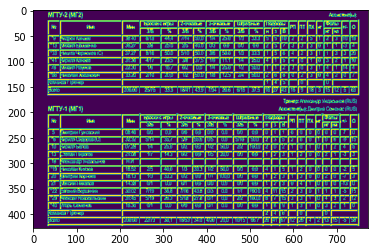

In [1]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot
import pytesseract

img = cv2.imread('data/proto_new3.jpg',0)

#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)

#inverting the image 
img_bin = 255-img_bin

pyplot.imshow(img_bin, aspect='auto')

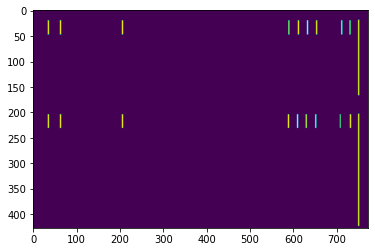

In [15]:
# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100

# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))

# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))

# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)

#Plot the generated image
pyplot.imshow(vertical_lines, aspect='auto')

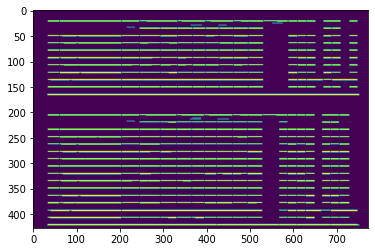

In [16]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)

#Plot the generated image
pyplot.imshow(horizontal_lines, aspect='auto')

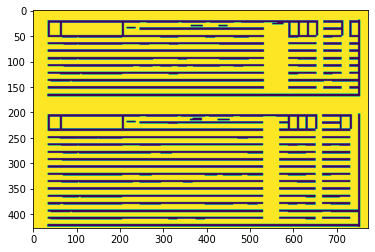

In [17]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)

#Plot the generated image
pyplot.imshow(img_vh, aspect='auto')

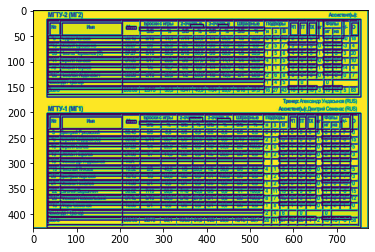

In [18]:
# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes), key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]

#Get mean of heights
mean = np.mean(heights)


#Create list box to store all boxes in  
box = []

# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])

#Plot the generated image
pyplot.imshow(image, aspect='auto')

In [19]:
#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0
#Sorting the boxes to their respective row and column
for i in range(len(box)):
    if(i==0):
        column.append(box[i])
        previous=box[i]
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]
            if(i==len(box)-1):
                row.append(column)
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])

# print(column)
# print(row)

#calculating maximum number of cells
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol
        
#Retrieving the center of each column
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
center=np.array(center)
center.sort()

#Regarding the distance to the columns center, the boxes are arranged in respective order
finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)

    

In [8]:
#from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2,   cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=1)

                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3', lang='rus')
                inner = inner +" "+ out
            outer.append(inner)
            

            
#Creating a dataframe of the generated OCR list
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row),countcol))
print(dataframe)
data = dataframe.style.set_properties(align="left")


                                                    0  \
0    MITY-2 (MI2) Accvecrenn{tsi):\n\nfe ee SEPP E...   
1    Pe re rere etrial\n\nA Pere ez fs ee\nFar pen...   
2                                        38:40\n     
3                                             13\n   
4                   37:27\n Huxuta Yepmetes (C)\n    
5                                   31:36\n  “41\n   
6                                      230\n  78\n   
7                                                    
8                                 Komanna / Tpexep\n   
9                                                      
10                                                      
11   [w]e [ee Pe fae fae oe ae Peele\n\n2 a\n[78 R...   
12                                       08:46\n     
13                           Kupien Cugopos (C)\n    
14                                   07:28\n  10\n   
15                                   21:08\n  13\n   
16                             

In [20]:
print(dataframe.to_string())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 0                                                                         1                   2         3       4       5   6         7       8               9
0    MITY-2 (MI2) Accvecrenn{tsi):\n\nfe ee SEPP Ere\n\nLe eee\nFar penta ——forar {we on Qo ae feo Peete fe Pe eters\n\n[re tesa [efor fr fer mPa peepe